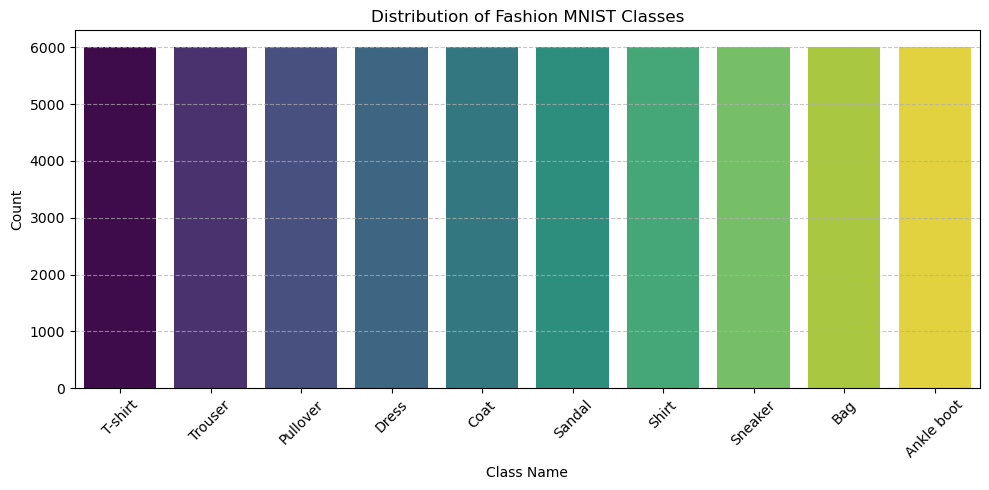

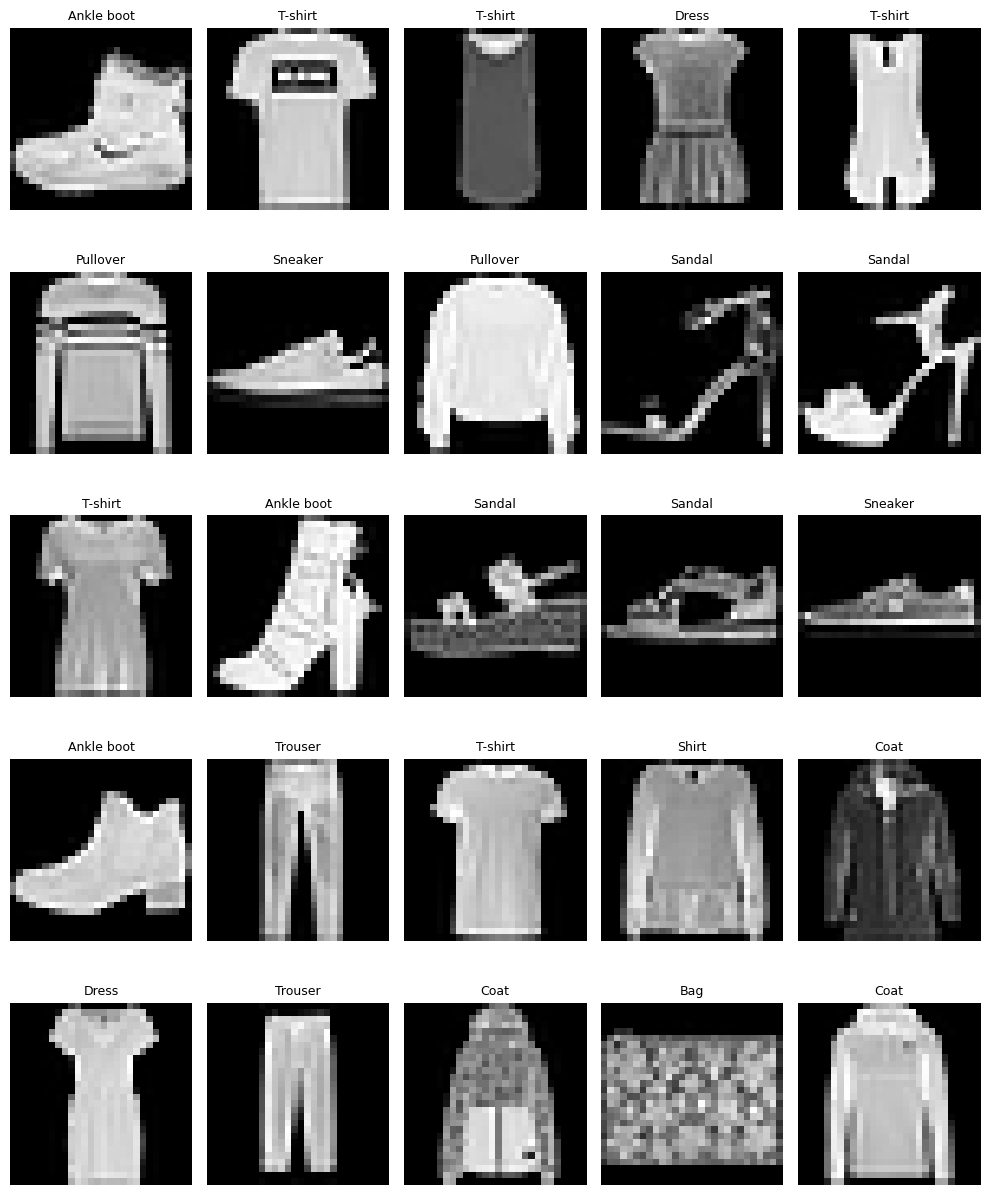

Epoch 1/20
188/188 - 19s - 102ms/step - accuracy: 0.7757 - loss: 2.1735 - val_accuracy: 0.8330 - val_loss: 1.5688 - learning_rate: 0.0010
Epoch 2/20
188/188 - 9s - 49ms/step - accuracy: 0.8457 - loss: 1.2490 - val_accuracy: 0.8327 - val_loss: 1.0553 - learning_rate: 0.0010
Epoch 3/20
188/188 - 10s - 52ms/step - accuracy: 0.8544 - loss: 0.8869 - val_accuracy: 0.8522 - val_loss: 0.8062 - learning_rate: 0.0010
Epoch 4/20
188/188 - 10s - 54ms/step - accuracy: 0.8565 - loss: 0.7179 - val_accuracy: 0.8587 - val_loss: 0.6674 - learning_rate: 0.0010
Epoch 5/20
188/188 - 11s - 58ms/step - accuracy: 0.8605 - loss: 0.6238 - val_accuracy: 0.8347 - val_loss: 0.6578 - learning_rate: 0.0010
Epoch 6/20
188/188 - 9s - 49ms/step - accuracy: 0.8613 - loss: 0.5795 - val_accuracy: 0.8463 - val_loss: 0.6019 - learning_rate: 0.0010
Epoch 7/20
188/188 - 9s - 47ms/step - accuracy: 0.8641 - loss: 0.5501 - val_accuracy: 0.8521 - val_loss: 0.5633 - learning_rate: 0.0010
Epoch 8/20
188/188 - 9s - 46ms/step - accur

ValueError: The output of the `schedule` function should be a float. Got: 0.0009048374486155808

In [3]:
import tensorflow as tf
from tensorflow.keras import layers, models, regularizers, callbacks
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

# Load Fashion MNIST Dataset
(x_train, y_train), (x_test, y_test) = tf.keras.datasets.fashion_mnist.load_data()

# Class labels
class_names = ['T-shirt', 'Trouser', 'Pullover', 'Dress', 'Coat',
               'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']

# Plot label distribution
def plot_label_distribution(labels, class_names):
    plt.figure(figsize=(10, 5))
    sns.countplot(x=labels, hue=labels, palette="viridis", legend=False)
    plt.xticks(np.arange(10), class_names, rotation=45)
    plt.title("Distribution of Fashion MNIST Classes")
    plt.xlabel("Class Name")
    plt.ylabel("Count")
    plt.grid(axis='y', linestyle='--', alpha=0.7)
    plt.tight_layout()
    plt.show()

# Plot sample images
def plot_fashion_mnist(images, labels, class_names, rows=5, cols=5):
    plt.figure(figsize=(2 * cols, 2.5 * rows))
    for i in range(rows * cols):
        plt.subplot(rows, cols, i + 1)
        plt.imshow(images[i], cmap='gray')
        plt.title(class_names[labels[i]], fontsize=9)
        plt.axis('off')
    plt.tight_layout()
    plt.show()

# You can comment these if running late or on limited time
# plot_label_distribution(y_train, class_names)
# plot_fashion_mnist(x_train, y_train, class_names)

# Normalize pixel values
x_train = x_train / 255.0
x_test = x_test / 255.0

# Flatten input images
x_train = x_train.reshape(-1, 784)
x_test = x_test.reshape(-1, 784)

def create_model():
    initializer = tf.keras.initializers.HeNormal()
    
    model = models.Sequential([
        layers.Input(shape=(784,)),

        layers.Dense(512, kernel_initializer=initializer, kernel_regularizer=regularizers.l2(0.0005)),
        layers.BatchNormalization(),
        layers.LeakyReLU(),
        layers.Dropout(0.4),

        layers.Dense(256, kernel_initializer=initializer, kernel_regularizer=regularizers.l2(0.0005)),
        layers.BatchNormalization(),
        layers.LeakyReLU(),
        layers.Dropout(0.3),

        layers.Dense(128, kernel_initializer=initializer, kernel_regularizer=regularizers.l2(0.0005)),
        layers.BatchNormalization(),
        layers.LeakyReLU(),
        layers.Dropout(0.2),

        layers.Dense(64, kernel_initializer=initializer, kernel_regularizer=regularizers.l2(0.0005)),
        layers.BatchNormalization(),
        layers.LeakyReLU(),
        layers.Dropout(0.1),

        layers.Dense(10, activation='softmax')
    ])
    return model

model = create_model()
model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=1e-3),
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])
model.summary()

# Learning rate scheduler (fixed to return float)
def scheduler(epoch, lr):
    if epoch < 10:
        return lr
    else:
        return lr * np.exp(-0.1)

lr_callback = callbacks.LearningRateScheduler(scheduler)

early_stop = callbacks.EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True)

# Train the model
history = model.fit(x_train, y_train,
                    validation_split=0.2,
                    epochs=20,
                    batch_size=256,
                    verbose=2,
                    callbacks=[early_stop, lr_callback])

# Plot Training History
def plot_history(history):
    plt.figure(figsize=(12, 5))

    plt.subplot(1, 2, 1)
    plt.plot(history.history['loss'], label='Train Loss')
    plt.plot(history.history['val_loss'], label='Val Loss')
    plt.title('Loss Over Epochs')
    plt.xlabel('Epoch')
    plt.ylabel('Loss')
    plt.legend()

    plt.subplot(1, 2, 2)
    plt.plot(history.history['accuracy'], label='Train Accuracy')
    plt.plot(history.history['val_accuracy'], label='Val Accuracy')
    plt.title('Accuracy Over Epochs')
    plt.xlabel('Epoch')
    plt.ylabel('Accuracy')
    plt.legend()

    plt.tight_layout()
    plt.show()

plot_history(history)

# Evaluate Model
test_loss, test_acc = model.evaluate(x_test, y_test, verbose=0)
print(f"Test Accuracy: {test_acc:.4f}")

# Predict and visualize sample results
def show_predictions(model, x_test, y_test):
    preds = model.predict(x_test)
    pred_classes = np.argmax(preds, axis=1)

    plt.figure(figsize=(12, 6))
    for i in range(10):
        plt.subplot(2, 5, i + 1)
        plt.imshow(x_test[i].reshape(28, 28), cmap='gray')
        plt.title(f"True: {class_names[y_test[i]]}\nPred: {class_names[pred_classes[i]]}")
        plt.axis('off')
    plt.tight_layout()
    plt.show()

show_predictions(model, x_test, y_test)


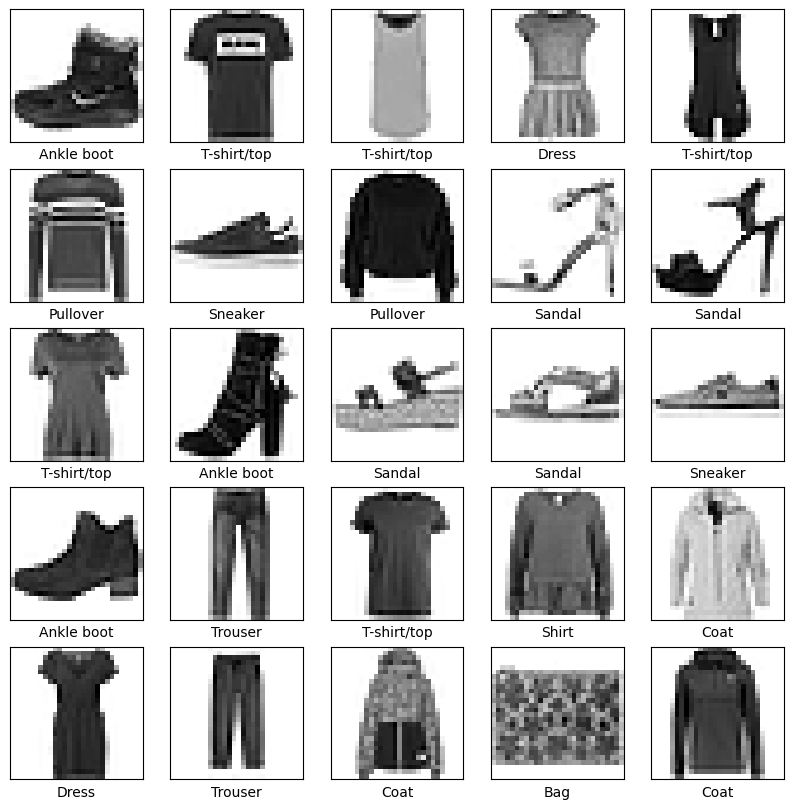

Epoch 1/20
375/375 ━━━━━━━━━━━━━━━━━━━━ 20s 33ms/step - accuracy: 0.5868 - loss: 1.2119 - val_accuracy: 0.8376 - val_loss: 0.4442 - learning_rate: 0.0010
Epoch 2/20
375/375 ━━━━━━━━━━━━━━━━━━━━ 12s 32ms/step - accuracy: 0.8129 - loss: 0.5580 - val_accuracy: 0.8519 - val_loss: 0.4010 - learning_rate: 0.0010
Epoch 3/20
375/375 ━━━━━━━━━━━━━━━━━━━━ 13s 34ms/step - accuracy: 0.8351 - loss: 0.4861 - val_accuracy: 0.8648 - val_loss: 0.3721 - learning_rate: 0.0010
Epoch 4/20
375/375 ━━━━━━━━━━━━━━━━━━━━ 21s 34ms/step - accuracy: 0.8491 - loss: 0.4481 - val_accuracy: 0.8751 - val_loss: 0.3489 - learning_rate: 0.0010
Epoch 5/20
375/375 ━━━━━━━━━━━━━━━━━━━━ 20s 33ms/step - accuracy: 0.8581 - loss: 0.4178 - val_accuracy: 0.8737 - val_loss: 0.3539 - learning_rate: 0.0010
Epoch 6/20
375/375 ━━━━━━━━━━━━━━━━━━━━ 21s 34ms/step - accuracy: 0.8663 - loss: 0.3947 - val_accuracy: 0.8813 - val_loss: 0.3312 - learning_rate: 0.0010
Epoch 7/20
375/375 ━━━━━━━━━━━━━━━━━━━━ 13s 33ms/step - accuracy: 0.8701 - l

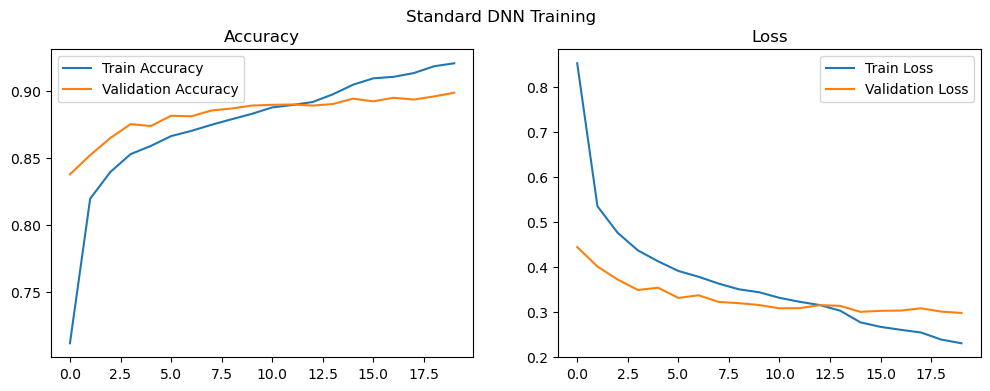

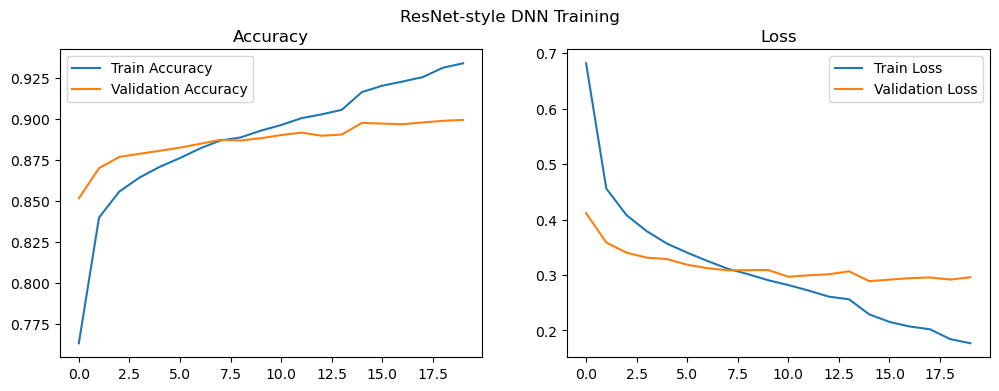

Standard DNN Test Accuracy: 0.8913
ResNet-style DNN Test Accuracy: 0.8878

Standard DNN Predictions:
313/313 ━━━━━━━━━━━━━━━━━━━━ 3s 7ms/step


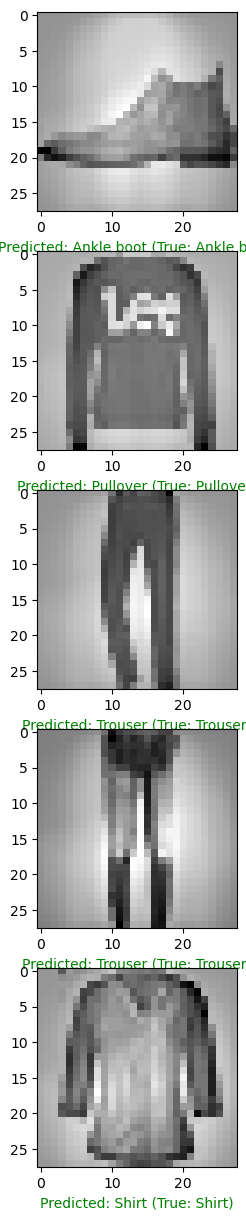


ResNet-style DNN Predictions:
313/313 ━━━━━━━━━━━━━━━━━━━━ 4s 10ms/step


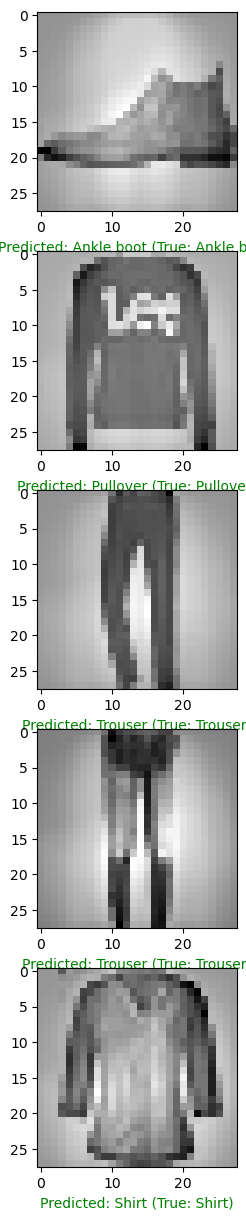

In [4]:
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow.keras.datasets import fashion_mnist
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Dense, Input, Add, Activation, Dropout, BatchNormalization
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.callbacks import ReduceLROnPlateau, EarlyStopping

# Set seeds for reproducibility
tf.random.set_seed(42)
np.random.seed(42)

# Load and preprocess data
(x_train, y_train), (x_test, y_test) = fashion_mnist.load_data()
x_train = x_train.astype('float32') / 255.0
x_test = x_test.astype('float32') / 255.0
y_train = to_categorical(y_train, 10)
y_test = to_categorical(y_test, 10)

# Flatten images
x_train_flat = x_train.reshape(-1, 28*28)
x_test_flat = x_test.reshape(-1, 28*28)

# Normalize inputs (zero mean, unit std)
mean = np.mean(x_train_flat, axis=0)
std = np.std(x_train_flat, axis=0) + 1e-7
x_train_flat = (x_train_flat - mean) / std
x_test_flat = (x_test_flat - mean) / std

# Class names for visualization
class_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat',
               'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']

# Optional: Visualize samples
plt.figure(figsize=(10,10))
for i in range(25):
    plt.subplot(5,5,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(x_train[i], cmap=plt.cm.binary)
    plt.xlabel(class_names[np.argmax(y_train[i])])
plt.show()

# Standard DNN with BatchNorm and Dropout
def create_dnn():
    inputs = Input(shape=(784,))
    x = Dense(512)(inputs)
    x = BatchNormalization()(x)
    x = Activation('relu')(x)
    x = Dropout(0.4)(x)

    x = Dense(256)(x)
    x = BatchNormalization()(x)
    x = Activation('relu')(x)
    x = Dropout(0.4)(x)

    x = Dense(128)(x)
    x = BatchNormalization()(x)
    x = Activation('relu')(x)
    x = Dropout(0.4)(x)

    x = Dense(64)(x)
    x = BatchNormalization()(x)
    x = Activation('relu')(x)
    x = Dropout(0.4)(x)

    outputs = Dense(10, activation='softmax')(x)
    return Model(inputs, outputs)

# ResNet-style DNN with BatchNorm and Dropout
def create_resnet_dnn():
    inputs = Input(shape=(784,))

    x = Dense(512)(inputs)
    x = BatchNormalization()(x)
    x = Activation('relu')(x)
    x = Dropout(0.4)(x)

    # Residual block 1
    x1 = Dense(512)(x)
    x1 = BatchNormalization()(x1)
    x1 = Activation('relu')(x1)
    x1 = Dropout(0.4)(x1)

    x2 = Dense(512)(x1)
    x2 = BatchNormalization()(x2)
    x2 = Activation('relu')(x2)
    x2 = Dropout(0.4)(x2)

    res1 = Add()([x, x2])
    res1 = Activation('relu')(res1)

    # Residual block 2
    x3 = Dense(256)(res1)
    x3 = BatchNormalization()(x3)
    x3 = Activation('relu')(x3)
    x3 = Dropout(0.4)(x3)

    x4 = Dense(256)(x3)
    x4 = BatchNormalization()(x4)
    x4 = Activation('relu')(x4)
    x4 = Dropout(0.4)(x4)

    res1_down = Dense(256)(res1)
    res1_down = BatchNormalization()(res1_down)
    res1_down = Activation('relu')(res1_down)

    res2 = Add()([res1_down, x4])
    res2 = Activation('relu')(res2)

    x_final = Dense(128)(res2)
    x_final = BatchNormalization()(x_final)
    x_final = Activation('relu')(x_final)
    x_final = Dropout(0.4)(x_final)

    outputs = Dense(10, activation='softmax')(x_final)

    return Model(inputs, outputs)

# Create and compile models
dnn_model = create_dnn()
resnet_model = create_resnet_dnn()

dnn_model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
resnet_model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

# Callbacks for learning rate reduction and early stopping
reduce_lr = ReduceLROnPlateau(monitor='val_loss', factor=0.5, patience=3, verbose=1)
early_stop = EarlyStopping(monitor='val_loss', patience=7, restore_best_weights=True)
callbacks = [reduce_lr, early_stop]

# Train models
dnn_history = dnn_model.fit(
    x_train_flat, y_train,
    epochs=20,
    batch_size=128,
    validation_split=0.2,
    callbacks=callbacks,
    verbose=1
)

resnet_history = resnet_model.fit(
    x_train_flat, y_train,
    epochs=20,
    batch_size=128,
    validation_split=0.2,
    callbacks=callbacks,
    verbose=1
)

# Plot training history
def plot_history(history, title):
    plt.figure(figsize=(12, 4))
    plt.suptitle(title)

    plt.subplot(1, 2, 1)
    plt.plot(history.history['accuracy'], label='Train Accuracy')
    plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
    plt.title('Accuracy')
    plt.legend()

    plt.subplot(1, 2, 2)
    plt.plot(history.history['loss'], label='Train Loss')
    plt.plot(history.history['val_loss'], label='Validation Loss')
    plt.title('Loss')
    plt.legend()

    plt.show()

plot_history(dnn_history, 'Standard DNN Training')
plot_history(resnet_history, 'ResNet-style DNN Training')

# Evaluate on test set
dnn_test_loss, dnn_test_acc = dnn_model.evaluate(x_test_flat, y_test, verbose=0)
resnet_test_loss, resnet_test_acc = resnet_model.evaluate(x_test_flat, y_test, verbose=0)
print(f"Standard DNN Test Accuracy: {dnn_test_acc:.4f}")
print(f"ResNet-style DNN Test Accuracy: {resnet_test_acc:.4f}")

# Make predictions and visualize some results
def plot_predictions(model, x_test, y_test, num_images=5):
    predictions = model.predict(x_test)
    plt.figure(figsize=(15, 3*num_images))
    for i in range(num_images):
        plt.subplot(num_images, 1, i+1)
        plt.imshow(x_test[i].reshape(28, 28), cmap=plt.cm.binary)
        pred_label = np.argmax(predictions[i])
        true_label = np.argmax(y_test[i])
        color = 'green' if pred_label == true_label else 'red'
        plt.xlabel(f"Predicted: {class_names[pred_label]} (True: {class_names[true_label]})", color=color)
    plt.show()

print("\nStandard DNN Predictions:")
plot_predictions(dnn_model, x_test_flat, y_test)

print("\nResNet-style DNN Predictions:")
plot_predictions(resnet_model, x_test_flat, y_test)
